In [1]:
from quantum_transformers.utils import plot_image
from quantum_transformers.datasets.mnist import get_mnist_dataloaders
from quantum_transformers.training import train
from quantum_transformers.transformers import ClassicalVisionTransformer

import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.get_device_name() if device.type == 'cuda' else 'cpu'

'NVIDIA A100-PCIE-40GB'

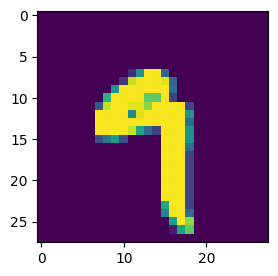

Number of training examples: 60000, Number of validation examples: 10000
Image size: 28x28, Number of channels: 1


In [3]:
mnist_train_dataloader, mnist_valid_dataloader = get_mnist_dataloaders(batch_size=64)
plot_image(next(iter(mnist_train_dataloader))[0][0].permute(1,2,0).numpy())
img_size = mnist_train_dataloader.dataset[0][0].shape[1]
num_channels = mnist_train_dataloader.dataset[0][0].shape[0]
print(f"Number of training examples: {len(mnist_train_dataloader.dataset)}, Number of validation examples: {len(mnist_valid_dataloader.dataset)}")
print(f"Image size: {img_size}x{img_size}, Number of channels: {num_channels}")

In [4]:
model = ClassicalVisionTransformer(img_size=28, num_channels=1, num_classes=10, patch_size=14, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32)
train(model, mnist_train_dataloader, mnist_valid_dataloader, num_classes=10, learning_rate=0.0003, num_epochs=30, device=device)

Epoch 1/30 (18.26s): Loss = 0.1801, AUC = 99.75%
Epoch 2/30 (34.31s): Loss = 0.1292, AUC = 99.80%
Epoch 3/30 (50.49s): Loss = 0.1121, AUC = 99.83%
Epoch 4/30 (66.63s): Loss = 0.0938, AUC = 99.86%
Epoch 5/30 (82.71s): Loss = 0.0861, AUC = 99.88%
Epoch 6/30 (98.81s): Loss = 0.0796, AUC = 99.89%
Epoch 7/30 (114.99s): Loss = 0.0879, AUC = 99.90%
Epoch 8/30 (130.97s): Loss = 0.0843, AUC = 99.90%
Epoch 9/30 (147.19s): Loss = 0.0784, AUC = 99.91%
Epoch 10/30 (163.60s): Loss = 0.0741, AUC = 99.91%
Epoch 11/30 (179.91s): Loss = 0.0739, AUC = 99.92%
Epoch 12/30 (196.06s): Loss = 0.0730, AUC = 99.92%
Epoch 13/30 (212.25s): Loss = 0.0691, AUC = 99.92%
Epoch 14/30 (228.38s): Loss = 0.0673, AUC = 99.92%
Epoch 15/30 (244.60s): Loss = 0.0672, AUC = 99.93%
Epoch 16/30 (260.76s): Loss = 0.0702, AUC = 99.93%
Epoch 17/30 (276.98s): Loss = 0.0663, AUC = 99.93%
Epoch 18/30 (293.15s): Loss = 0.0607, AUC = 99.93%
Epoch 19/30 (309.33s): Loss = 0.0583, AUC = 99.94%
Epoch 20/30 (325.53s): Loss = 0.0669, AUC = 99

In [5]:
model = ClassicalVisionTransformer(img_size=28, num_channels=1, num_classes=10, patch_size=14, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3)
train(model, mnist_train_dataloader, mnist_valid_dataloader, num_classes=10, learning_rate=0.0003, num_epochs=30, device=device)

Epoch 1/30 (16.18s): Loss = 1.3153, AUC = 92.99%
Epoch 2/30 (32.42s): Loss = 0.9083, AUC = 94.23%
Epoch 3/30 (48.96s): Loss = 0.7369, AUC = 95.07%
Epoch 4/30 (65.23s): Loss = 0.6439, AUC = 95.66%
Epoch 5/30 (81.50s): Loss = 0.5867, AUC = 96.09%
Epoch 6/30 (97.66s): Loss = 0.5531, AUC = 96.42%
Epoch 7/30 (113.88s): Loss = 0.5249, AUC = 96.68%
Epoch 8/30 (130.18s): Loss = 0.5092, AUC = 96.88%
Epoch 9/30 (146.55s): Loss = 0.4920, AUC = 97.05%
Epoch 10/30 (163.15s): Loss = 0.4772, AUC = 97.19%
Epoch 11/30 (179.53s): Loss = 0.4726, AUC = 97.31%
Epoch 12/30 (195.78s): Loss = 0.4618, AUC = 97.42%
Epoch 13/30 (212.53s): Loss = 0.4467, AUC = 97.51%
Epoch 14/30 (228.30s): Loss = 0.4481, AUC = 97.59%
Epoch 15/30 (243.28s): Loss = 0.4368, AUC = 97.66%
Epoch 16/30 (257.84s): Loss = 0.4311, AUC = 97.73%
Epoch 17/30 (272.40s): Loss = 0.4267, AUC = 97.79%
Epoch 18/30 (286.91s): Loss = 0.4239, AUC = 97.84%
Epoch 19/30 (301.29s): Loss = 0.4178, AUC = 97.89%
Epoch 20/30 (315.63s): Loss = 0.4130, AUC = 97